In [1]:
# Import LIBRARIES
import tensorflow as tf
from tensorflow import keras
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the MNIST dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
print(train_images.shape ,train_labels.shape,test_images.shape,test_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


* Train Data = 60,000 images
* Test Data = 10,000 images
* Image Dimension - 28*28
* GrayScale Image - 1 Channel

In [4]:
# Preprocess the data
train_images = train_images / 255.0
test_images = test_images / 255.0

In [5]:
# Build a CNN model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Train the model
model.fit(train_images.reshape(-1, 28, 28, 1), train_labels, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 29s 37ms/step - loss: 0.2705 - accuracy: 0.9161 - val_loss: 0.0822 - val_accuracy: 0.9758
Epoch 2/10
750/750 [==============================] - 32s 43ms/step - loss: 0.0901 - accuracy: 0.9730 - val_loss: 0.0490 - val_accuracy: 0.9857
Epoch 3/10
750/750 [==============================] - 27s 35ms/step - loss: 0.0669 - accuracy: 0.9795 - val_loss: 0.0415 - val_accuracy: 0.9877
Epoch 4/10
750/750 [==============================] - 32s 43ms/step - loss: 0.0552 - accuracy: 0.9826 - val_loss: 0.0400 - val_accuracy: 0.9883
Epoch 5/10
750/750 [==============================] - 34s 45ms/step - loss: 0.0455 - accuracy: 0.9862 - val_loss: 0.0356 - val_accuracy: 0.9899
Epoch 6/10
750/750 [==============================] - 29s 39ms/step - loss: 0.0384 - accuracy: 0.9879 - val_loss: 0.0392 - val_accuracy: 0.9906
Epoch 7/10
750/750 [==============================] - 26s 35ms/step - loss: 0.0314 - accuracy: 0.9904 - val_loss: 0.0381 - val_accuracy:

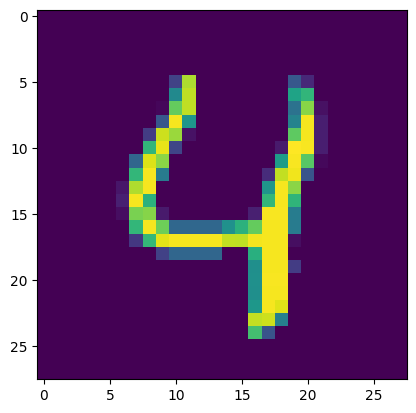

In [8]:
plt.imshow(test_images[4])
plt.show()

In [9]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_images.reshape(-1, 28, 28, 1), test_labels)

313/313 [==============================] - 3s 9ms/step - loss: 0.0266 - accuracy: 0.9926


In [10]:
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

Test accuracy: 99.26%


313/313 [==============================] - 3s 8ms/step


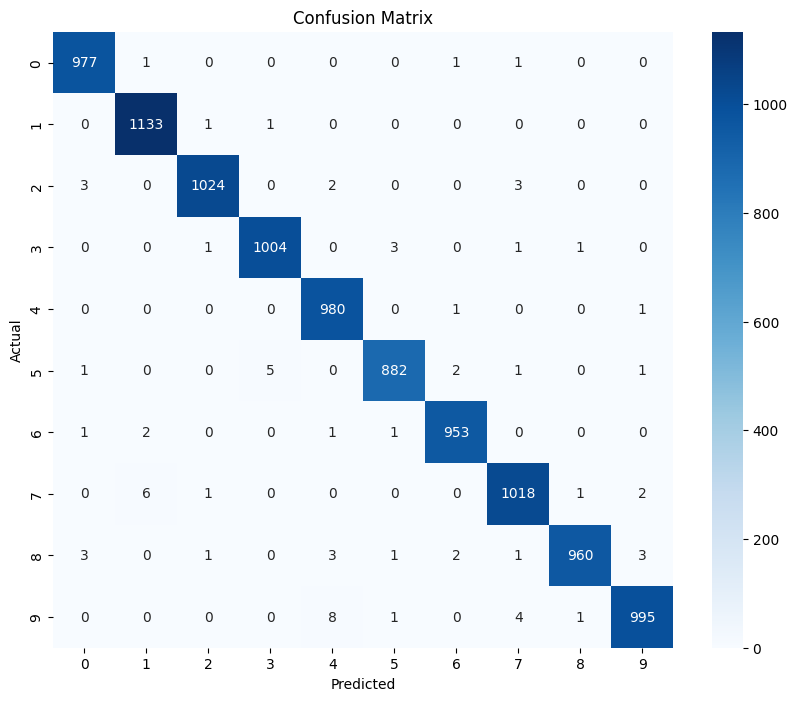

In [11]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

mnist = keras.datasets.mnist
(_, _), (test_images, test_labels) = mnist.load_data()
test_images = test_images / 255.0  # Preprocess the test images

# Reshape test images to match the model's input shape
test_images = test_images.reshape(-1, 28, 28, 1)

# Use your model to make predictions on the test dataset
predictions = model.predict(test_images)

# Get the predicted digit for each image
predicted_digits = np.argmax(predictions, axis=1)

# Create the confusion matrix
cm = confusion_matrix(test_labels, predicted_digits)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [12]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras

image_path = 'D:\\4_1Sem\\Project\\Hand_Written_Classification\\2.jpeg' 
frame = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load the image in grayscale

# Preprocess the image to match the model's input shape
frame = cv2.resize(frame, (28, 28))
frame = frame / 255.0

# Reshape the image to match the model's input shape
input_image = frame.reshape(1, 28, 28, 1)

# Use your model to make predictions
predictions = model.predict(input_image)

# Get the predicted digit (index with the highest probability)
predicted_digit = np.argmax(predictions)

print(f'Predicted Digit: {predicted_digit}')


1/1 [==============================] - 0s 40ms/step
Predicted Digit: 2


In [13]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Open the camera (usually, camera index 0 is the built-in camera)
cap = cv2.VideoCapture(0)

while True:
    # Capture a frame from the camera
    ret, frame = cap.read()

    # Preprocess the frame to match the model's input shape
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray_frame = cv2.resize(gray_frame, (28, 28))
    gray_frame = gray_frame / 255.0

    # Reshape the frame to match the model's input shape
    input_image = gray_frame.reshape(1, 28, 28, 1)

    # Use your model to make predictions
    predictions = model.predict(input_image)

    # Get the predicted digit (index with the highest probability)
    predicted_digit = np.argmax(predictions)

    # Display the frame with the predicted digit
    cv2.putText(frame, f"Predicted Digit: {predicted_digit}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow('Camera Input', frame)

    # Press 'Esc' to exit
    if cv2.waitKey(1) & 0xFF == 27:
        break

# Release the camera and close the OpenCV window
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 34ms/step
